In [350]:
#Prediciones basdo en regresion Lineal
import pandas as pd

data = pd.read_csv('housing.csv')

In [351]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [352]:
data_na = data.dropna()

In [353]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [354]:
dummies = pd.get_dummies(data_na['ocean_proximity'], dtype=int)

In [355]:
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [356]:
data_na = data_na.join(dummies)

In [357]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  int64  
 11  INLAND              20433 non-null  int64  
 12  ISLAND              20433 non-null  int64  
 13  NEAR BAY            20433 non-null  int64  
 14  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 2.5+ MB


In [358]:
data_na = data_na.drop('ocean_proximity', axis=1)

In [359]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  int64  
 10  INLAND              20433 non-null  int64  
 11  ISLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


In [360]:
import seaborn as sb

<Axes: xlabel='median_house_value', ylabel='median_income'>

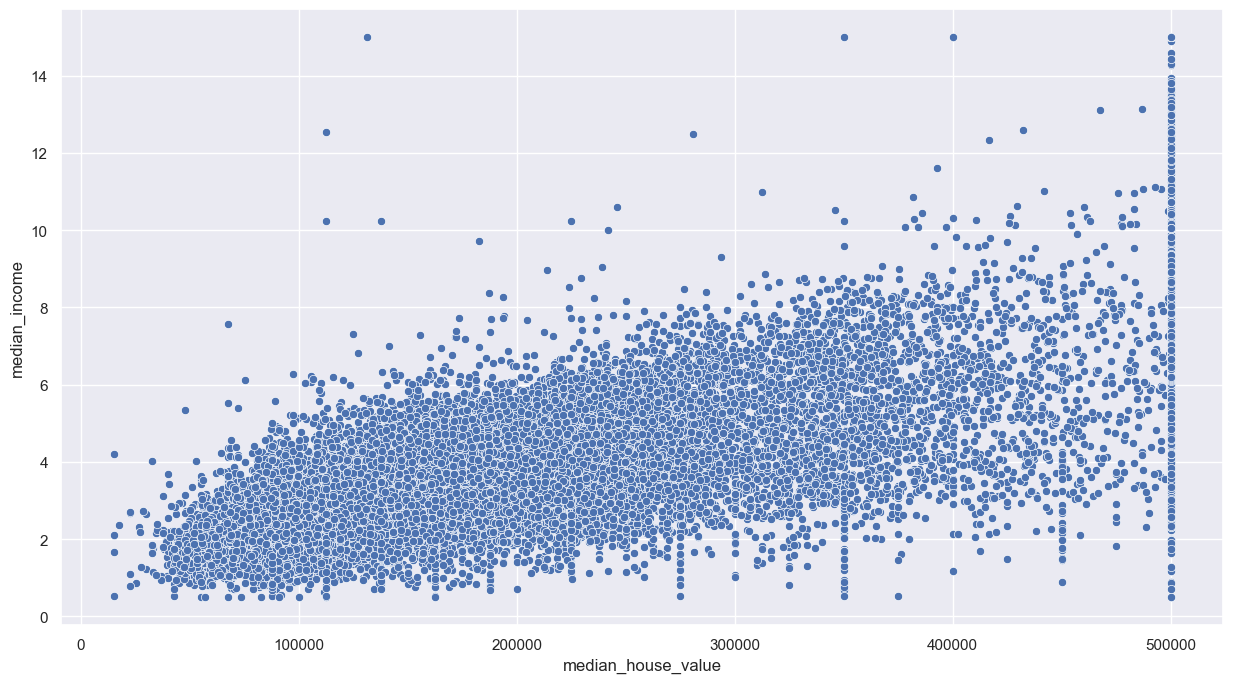

In [361]:
sb.scatterplot(x=data_na['median_house_value'], y=data_na['median_income'])

In [362]:
# A veces se hace ncesario agregar nuevas ccaracteristicas cuando dos o mas variables podrian tener alguna relación
# Por ejemplo habitaciónes y habitaciones para dormir ...

data_na["bedroom_ratio"] = data_na['total_bedrooms'] / data_na['total_rooms']



<Axes: >

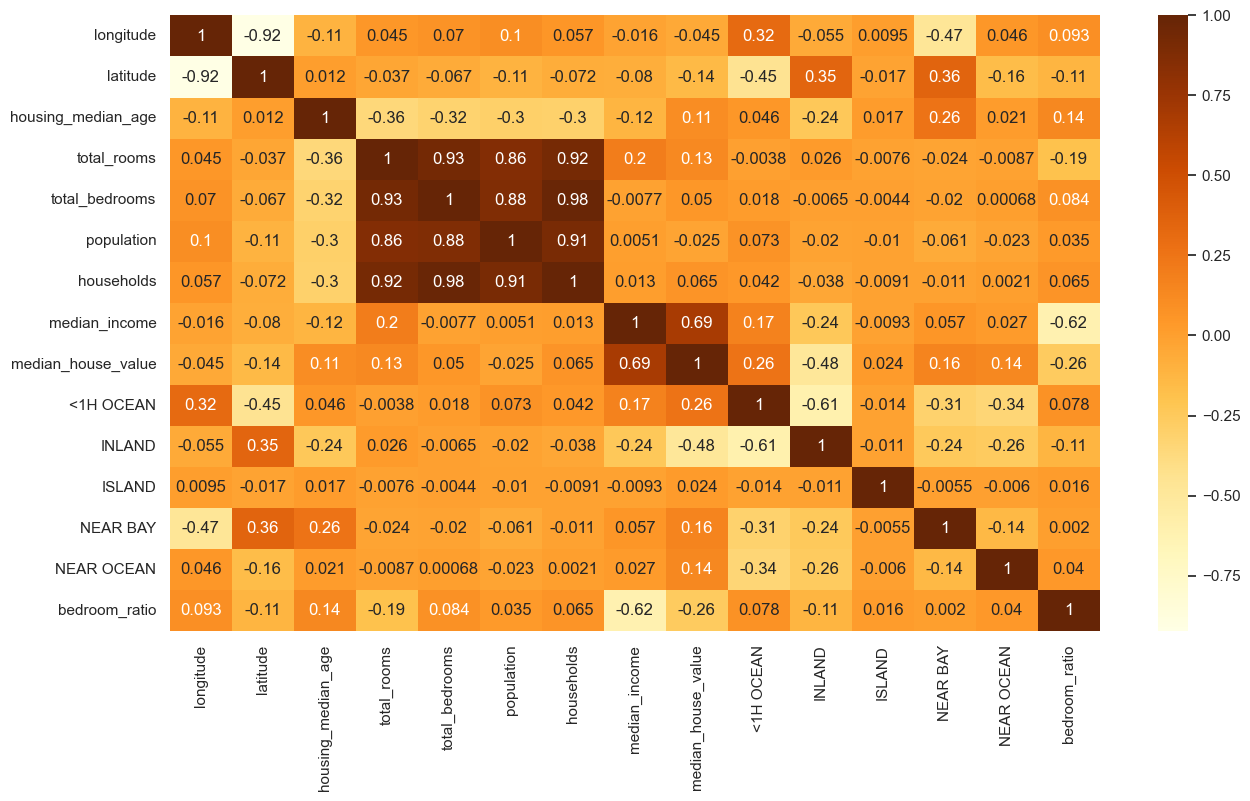

In [363]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data_na.corr(), annot= True, cmap = 'YlOrBr')

In [364]:
# entre mas habitaciónes no especificas mayor es el precio, podrian usarse para otras cosas

In [365]:
# Separar las características de la etiqueta
x = data_na.drop(['median_house_value'], axis =1)
y = data_na['median_house_value']

In [366]:
# Separar la data en dos partes: 1 de entrenamiento y un ode prueba 
from sklearn.model_selection import train_test_split


In [367]:
x_ent, x_test, y_ent, y_test = train_test_split(x,y,test_size=.2)

In [368]:
x_test.shape

(4087, 14)

In [369]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [370]:
# Entrenamos el modelo
model.fit(x_ent, y_ent)

LinearRegression()

In [371]:
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)

,predictions,real value
13522,221192.853047,155000.0
8696,291413.916912,285900.0
14651,195211.689125,178300.0
7034,251649.148789,160600.0
5537,408169.952385,500001.0
...,...,...
11029,191258.355772,220100.0
7319,158765.963605,154600.0
15303,166607.148885,500001.0
7589,205189.867440,112500.0


In [372]:
# 500001 Este es un ejemplo el por que a veces se deben pre-procesar mas los datos, 
# cuando se tiene limite como maximo 50000 la linea batalla para adaptarse por que tiene muchso datos y muchos quedan en 5000 cuando realmente valen mas
# 
# A veces el modelo funciona muy bien con los datos de entrenamiento pero muy mal con los datos de prueba
# Esto se concoe como Overfitting o sobreajuste, aprende los datos de prueba pero luego no puede generalizar
print(model.score(x_ent, y_ent))

0.6489635698937442


In [373]:
print(model.score(x_test, y_test))
score0 = model.score(x_test, y_test)

0.6643791544420401


In [374]:
# También se puede calcular el error, el valor agrupado entre valores reales y predicciones

from sklearn.metrics import mean_squared_error
import numpy as np

mse0 = mean_squared_error(y_test, predictions)

In [375]:
mse0

4448567192.554948

In [376]:
# EL Error es bastante grande, es muy comun en machin learning 
# Cuando queremos calcular el error no solos calculamos error y residuales
# Sino que se elevan al cadrado:
# Para que los negativos se hagan positivos 
# para que las diferencias se hagan mas notorias, si algunos datos tienen poco error los numeros se mantienen pequenios 
# Pero sino aumentan considerablemente

# Revisemos la raiz cuadrada
rmse = np.sqrt(mse0)


In [377]:
rmse

66697.58011018802

In [378]:
# Y este dato en promedio cuanto estamos fallandoos al calcular el precio de todas las casa


In [379]:
# Scalr o escalamiento 
# El problema es que cuando estamos entrenando los datos numericos, es posible que hayan numeros muy grandes y muy pequenios
# y el componente de  mayor peso a los numeros mas grandes... entonces usar scaler para igualar los datos y los rangos 
# Y asi el modelo no le dara mayor importancia alos numeros grandes
# Generalmente se escalan las características y no las etiquetas 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_ent_esc = scaler.fit_transform(x_ent)
x_test_esc = scaler.fit_transform(x_test)

In [380]:
pd.DataFrame(x_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.265287,0.974735,0.347519,0.815318,1.343131,0.710565,1.431845,-0.465412,-0.887810,-0.682552,-0.017492,2.842730,-0.388229,0.648765
1,0.649508,-0.843798,-0.049278,1.125975,1.265230,2.907952,1.385089,-0.115549,1.126367,-0.682552,-0.017492,-0.351775,-0.388229,-0.038416
2,1.219446,-1.340614,-0.446074,0.021721,0.422487,-0.128533,0.385034,-0.902423,-0.887810,-0.682552,-0.017492,-0.351775,2.575801,0.934527
3,0.574516,-0.778181,-1.080949,-1.017928,-0.967921,-0.975497,-0.942312,0.059753,1.126367,-0.682552,-0.017492,-0.351775,-0.388229,1.679469
4,0.219554,-0.651634,0.506237,-0.277482,0.037705,0.721928,0.055145,-0.741347,-0.887810,-0.682552,-0.017492,-0.351775,2.575801,1.033377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.410271,2.338635,-1.160308,0.980268,1.404507,0.589945,1.486393,-1.133515,-0.887810,1.465089,-0.017492,-0.351775,-0.388229,0.416665
16342,-1.260287,0.941926,0.664956,-0.385158,-0.410814,0.094353,-0.399425,-0.116554,-0.887810,-0.682552,-0.017492,2.842730,-0.388229,-0.175352
16343,0.529520,-0.750059,-0.049278,1.134223,2.228365,0.775246,2.470863,-0.285351,1.126367,-0.682552,-0.017492,-0.351775,-0.388229,1.324531
16344,-1.215292,0.904431,-0.049278,-0.100618,-0.290422,-0.279745,-0.121488,0.515114,1.126367,-0.682552,-0.017492,-0.351775,-0.388229,-0.711083


In [381]:
# Se proponer como ejercicio complementario el siguiente enunciado.

In [382]:
#Improve the model of houses with linear regression PRACTICE EXERCISE 4.1

#In the lesson "Linear Regression Exercise" we used linear regression to predict house prices, however the data has hard bounds, for example:

#• If a house is 50 years old or older, the data indicates 50.
#• If the price of a house is 500,000 or more, the data indicates 500,000.
#• Income, with a maximum of 15.

#The problem with this is that the model will struggle to fit since some data is limited (like those two), and some is not (like size, rooms, etc.).

#For the task, you'll need to load the data and delete all the ones that are hitting the limit (eg delete all the house records with the maximum age, those with the maximum price, and the maximum income).

#Carry out the process with the resulting data set: the separation of training and test data, training and prediction.

#Was the result better or worse? Why do you think that is so?

In [383]:
# First thing is to delete filtered

In [508]:
# Filter rows where 

##
df_filtered = data_na.query('(housing_median_age < 50)')
df_filtered1 = data_na.query('(median_income < 15)')
df_filtered2 = data_na.query('(median_house_value < 500000)')
df_filtered3 = data_na.query('(housing_median_age < 50) & (median_house_value < 500000) & (median_house_value < 500000)')

print(f"tamanio original: {data_na.size}")
print(f"tamanio despues de filtrado housing_median_age & median_income & median_house_value: {df_filtered3.size}")

df_filtered2.head()

tamanio original: 306495
tamanio despues de filtrado housing_median_age & median_income & median_house_value: 272955


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096


<Axes: xlabel='median_house_value', ylabel='median_income'>

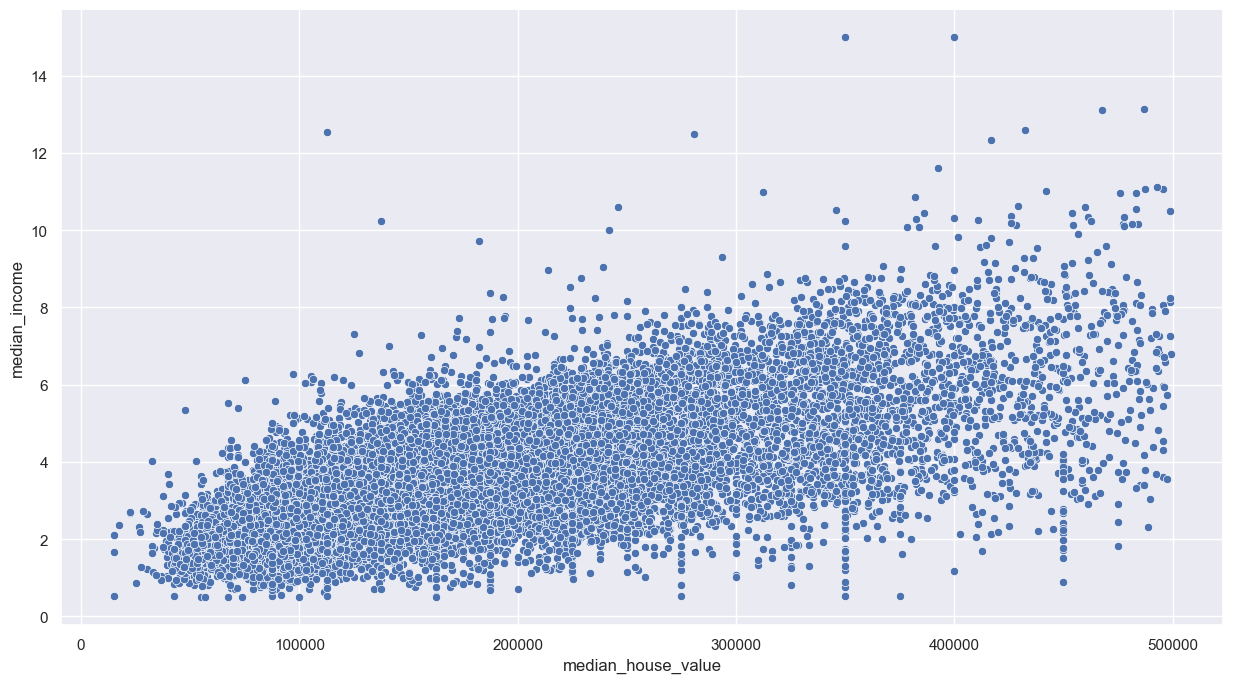

In [510]:
sb.scatterplot(x=df_filtered3['median_house_value'], y=df_filtered3['median_income'])

<Axes: >

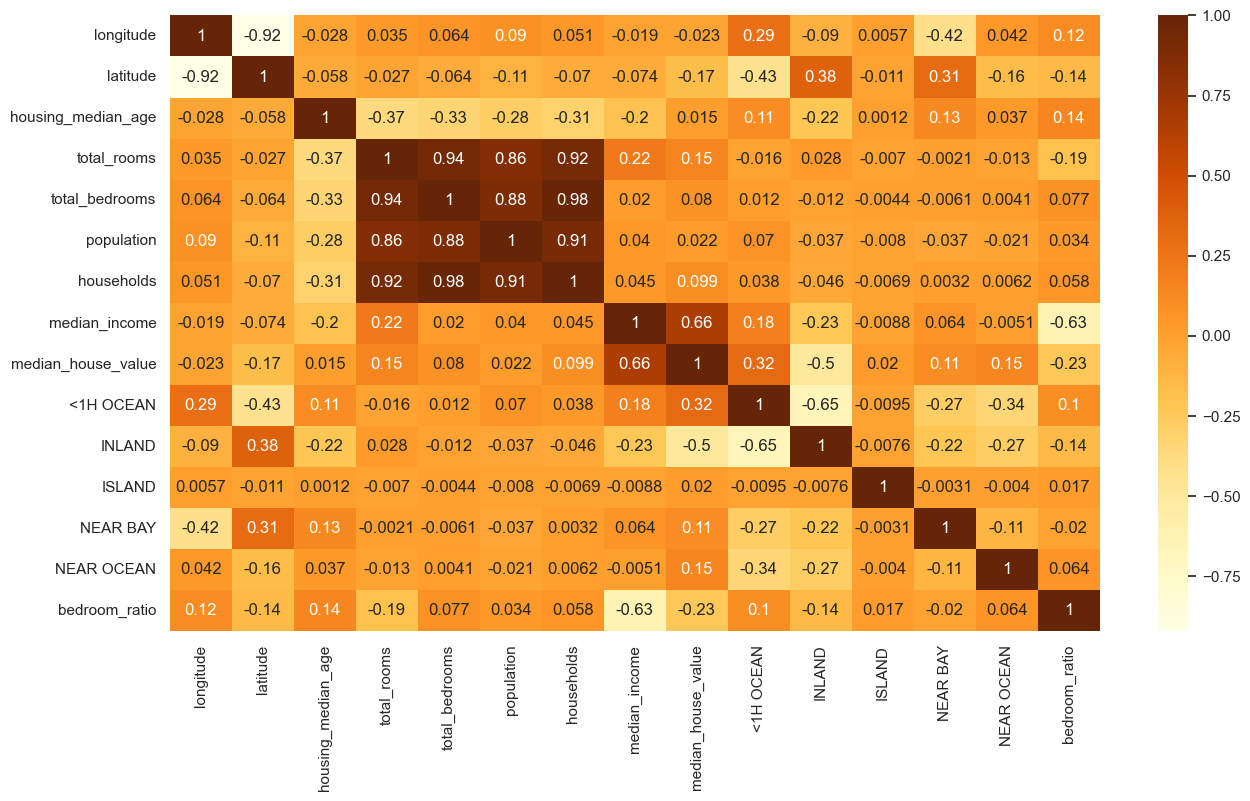

In [512]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(df_filtered3.corr(), annot= True, cmap = 'YlOrBr')


In [387]:
# Separar las características de la etiqueta
x = df_filtered.drop(['median_house_value'], axis =1)
y = df_filtered['median_house_value']

In [388]:
x_ent, x_test, y_ent, y_test = train_test_split(x, y, test_size=.2)

In [389]:
x_test.shape

(3798, 14)

In [390]:
# Entrenamos el modelo
model.fit(x_ent, y_ent)

LinearRegression()

In [391]:
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)

,predictions,real value
6065,307534.525353,368300.0
2209,128535.884438,68000.0
10977,236226.896547,213800.0
13334,124290.754166,167500.0
8302,276231.218003,406900.0
...,...,...
11271,203687.239477,213300.0
20365,308382.197480,259300.0
12812,218540.212570,178800.0
5333,235921.616768,393800.0


In [444]:
#Score
score1 = model.score(x_ent, y_ent)
print(score1)

0.6522452962397778


In [448]:
#Error
mse1 = mean_squared_error(y_test, predictions)

In [450]:
mse1


3945588395.4120426

In [494]:
# Separar las características de la etiqueta
x = df_filtered1.drop(['median_house_value'], axis =1)
y = df_filtered1['median_house_value']

x_ent, x_test, y_ent, y_test = train_test_split(x, y, test_size=.2)
x_test.shape
# Entrenamos el modelo
model.fit(x_ent, y_ent)
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)
#Score
score2 = model.score(x_ent, y_ent)
mse2 = mean_squared_error(y_test, predictions)

In [500]:
# Separar las características de la etiqueta
x = df_filtered2.drop(['median_house_value'], axis =1)
y = df_filtered2['median_house_value']

x_ent, x_test, y_ent, y_test = train_test_split(x, y, test_size=.2)
x_test.shape
# Entrenamos el modelo
model.fit(x_ent, y_ent)
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)
#Score
score3 = model.score(x_ent, y_ent)
mse3 = mean_squared_error(y_test, predictions)

In [514]:
# Separar las características de la etiqueta
x = df_filtered3.drop(['median_house_value'], axis =1)
y = df_filtered3['median_house_value']

x_ent, x_test, y_ent, y_test = train_test_split(x, y, test_size=.2)
x_test.shape
# Entrenamos el modelo
model.fit(x_ent, y_ent)
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)
#Score
score4 = model.score(x_ent, y_ent)
mse4 = mean_squared_error(y_test, predictions)

In [516]:
# Comparacion de los modelos
comparission = pd.DataFrame(columns= ["modelo", "score", "mse"])
comparission.loc[0] = ["Modelo 0", score0, mse0] #Original
comparission.loc[1] = ["Modelo 1", score1, mse1] #Filtrando housing_median_age
comparission.loc[2] = ["Modelo 2", score2, mse2] #Filtrando median_income
comparission.loc[3] = ["Modelo 3", score3, mse3] #Filtrando median_house_value
comparission.loc[4] = ["Modelo 4", score4, mse4] #Filtrando Todos


In [518]:
print(comparission)

     modelo     score           mse
0  Modelo 0  0.664379  4.448567e+09
1  Modelo 1  0.652245  3.945588e+09
2  Modelo 2  0.656027  4.638261e+09
3  Modelo 3  0.626094  3.662300e+09
4  Modelo 4  0.637590  3.356203e+09
